In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast
import math
import os
import numpy as np

Estación MER donde si funciona

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


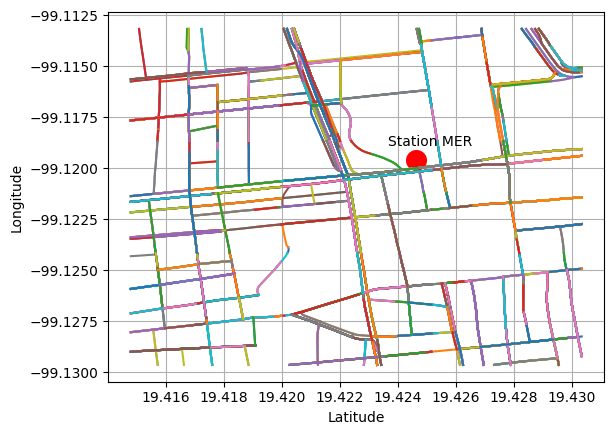

In [4]:
# Primero leo el archivo
dir = "/content/drive/MyDrive/Traffic_data/traffic_"
station_name = "MER"
dir_file = dir+station_name+".csv"
traffic_data = pd.read_csv(dir_file)
# Luego guardo todas las calles únicas. Ya que una calle se va a estar repitiendo en teoría cada 15 min (varias veces al día)
streets_unique = set(traffic_data.coordinates)
streets = {i:string for i, string in enumerate(streets_unique)}
all_points = []
for row in range(len(streets)):
    coordinates = ast.literal_eval(streets[row])
    all_points.append(coordinates)
# MER
station_latitude = 19.42461
station_longitude = -99.119594
# Luego las grafico
plt.figure()
for coords in all_points:
    x = [punto[0] for punto in coords]
    y = [punto[1] for punto in coords]
    plt.plot(x, y)
plt.scatter([station_latitude], [station_longitude], color='red', marker='o', s=200, label='SAC')
name = "Station "+ station_name
plt.annotate(name, (station_latitude, station_longitude), xytext=(-20, 10), textcoords='offset points', color='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [5]:
len(streets_unique)

2504

## Parte que yo hice

In [6]:
#Vamos a crear una función para ver si hay coordenadas contenidas en otras coordenadas más grandes
def calle_contenida(s1,s2):
  contador = 0
  for coordenada1 in s1:
    for coordenada2 in s2:
      if coordenada1 == coordenada2:
        contador += 1
  if contador == len(s2):
    return True
  else:
    return False

In [ ]:
#Quitamos las calles que están contenidas en otras calles
unique_new_streets = []
for i in range(len(streets)):
  c = 0
  for j in range(i+1,len(streets)):
    if calle_contenida(streets[i],streets[j]):
      c += 1
  if c == 0:
    unique_new_streets.append(streets[i])

In [ ]:
traffic_data = pd.read_csv(dir_file)
# Luego guardo todas las calles únicas. Ya que una calle se va a estar repitiendo en teoría cada 15 min (varias veces al día)
streets_unique = set(traffic_data.coordinates)
# Crear un diccionario que asigne un número a cada calle única. La llave son las coordenadas que identifican cada calle
streets_dictionary = {string:i for i, string in enumerate(streets_unique)}
print(len(streets_dictionary))
# Crear un diccionario que asigne un número a cada calle única. La llave es el ID
streets = {i:ast.literal_eval(string) for i, string in enumerate(streets_unique)}
# Calcula la distancia de cada punto de cada calle a la estación de interés, y guarda la distancia del punto más cercan
# en un diccionario, la clave es el id de la calle y el valor es su distancia a la estación de interés
diff_streets = []
dict_min = {}
for coordinates in streets_dictionary:
    diff_points = []
    coordinates = ast.literal_eval(coordinates)
    for coordinate in coordinates:
        diff_points.append(math.sqrt((station_latitude- coordinate[0])**2 + (station_longitude- coordinate[1])**2))
    nearest_point = min(diff_points)
    dict_min[streets_dictionary[str(coordinates)]] = nearest_point

sort_distance_streets = sorted(dict_min.items(), key=lambda x: x[1])
nearest_street = sort_distance_streets
nearest_street

2504


[(24, 0.0003950066327901301),
 (323, 0.0003950066327901301),
 (510, 0.0003950066327901301),
 (679, 0.0003950066327901301),
 (825, 0.0003950066327901301),
 (987, 0.0003950066327901301),
 (1000, 0.0003950066327901301),
 (1218, 0.0003950066327901301),
 (1291, 0.0003950066327901301),
 (1364, 0.0003950066327901301),
 (1471, 0.0003950066327901301),
 (1643, 0.0003950066327901301),
 (2052, 0.0003950066327901301),
 (2227, 0.0003950066327901301),
 (2255, 0.0003950066327901301),
 (2284, 0.0003950066327901301),
 (2377, 0.0003950066327901301),
 (387, 0.00039520809623977096),
 (1729, 0.00039520809623977096),
 (1857, 0.00039520809623977096),
 (322, 0.0004058664881383485),
 (2272, 0.0004058664881383485),
 (1576, 0.0004426802673086822),
 (111, 0.00044750004872193445),
 (297, 0.00044750004872193445),
 (1950, 0.00044750004872193445),
 (2158, 0.00044750004872193445),
 (2347, 0.0005187514885842789),
 (53, 0.0005709928855828848),
 (516, 0.0005709928855828848),
 (1170, 0.0005709928855828848),
 (2384, 0.00057

In [ ]:
streets_dictionary

{'[[19.42073456145099, -99.11440372467041], [19.421002695793273, -99.11544039845467], [19.42112032076418, -99.11584943532944], [19.421203796549985, -99.11613240838051], [19.42124300487362, -99.11624908447266], [19.42124553444289, -99.11626115441322]]': 0,
 '[[19.422711419833014, -99.12403419613838], [19.42272406767935, -99.1241455078125]]': 1,
 '[[19.415819475960333, -99.11750167608261], [19.415797973936154, -99.11750435829163], [19.415753705062848, -99.11750704050064], [19.415644930117, -99.11752715706825], [19.41496065981814, -99.11762237548828], [19.41491639094483, -99.11762773990631], [19.414792438099564, -99.11764517426491]]': 2,
 '[[19.424437850857625, -99.12758946418762], [19.424474529611995, -99.12816748023033]]': 3,
 '[[19.415708171364585, -99.11865234375], [19.41571196583944, -99.11858394742012], [19.41572461408896, -99.11839082837105], [19.41573220303867, -99.11815613508224], [19.41573220303867, -99.11809846758842], [19.415747380938086, -99.1178248822689], [19.41575370506284

In [ ]:
def obtener_id(coordenadas):
    coord_str = str(coordenadas)
    #return int(streets_dictionary.get(coord_str, None))
    id_value = streets_dictionary.get(coord_str, None)

    # Convertir a int si existe un valor, de lo contrario devolver None
    return int(id_value) if id_value is not None else None
# Agregar una nueva columna 'IDs' al DataFrame
traffic_data['IDs'] = traffic_data['coordinates'].apply(obtener_id)

In [ ]:
df = traffic_data[traffic_data["IDs"] == nearest_street[2]]
df

In [ ]:
nearest_street[0]

(24, 0.0003950066327901301)

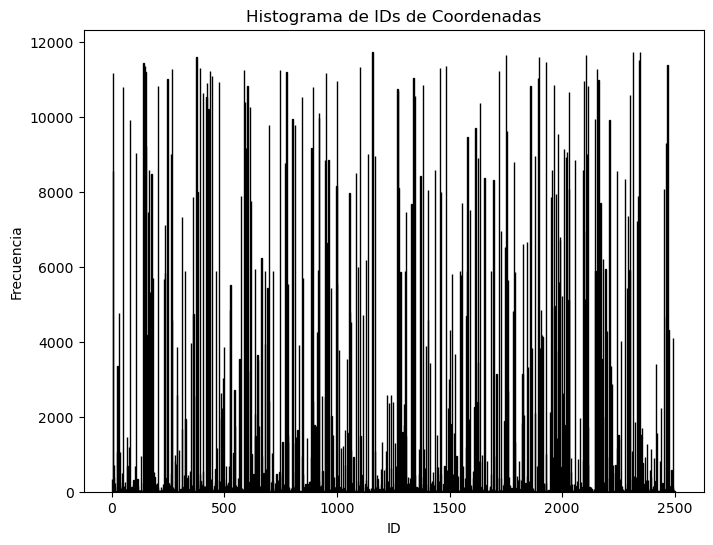

In [ ]:
ids = list(traffic_data.IDs)

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(ids, bins=len(set(ids)), edgecolor='black')

# Configurar el título y etiquetas
plt.title('Histograma de IDs de Coordenadas')
plt.xlabel('ID')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [ ]:
from collections import Counter
ids = list(traffic_data.IDs)
# Contar la frecuencia de los IDs
frecuencia_ids = Counter(ids)

# Convertir el Counter a un diccionario (opcional)
frecuencia_dict = dict(frecuencia_ids)

# Mostrar el resultado
print(frecuencia_dict)



{2243: 8546, 641: 34, 2319: 409, 2170: 7709, 289: 3873, 891: 2415, 1434: 8589, 647: 3635, 1747: 6529, 1200: 1332, 958: 6648, 2366: 208, 2415: 277, 348: 548, 1405: 8057, 1107: 193, 1787: 8798, 1966: 4948, 497: 3869, 154: 4177, 1655: 8372, 2175: 3530, 1575: 4682, 1812: 43, 2263: 4028, 782: 5530, 1273: 8097, 2092: 8585, 1531: 944, 1559: 673, 1551: 5792, 2337: 7885, 2097: 209, 2149: 80, 310: 1663, 36: 1052, 1906: 92, 2294: 7353, 176: 8468, 1660: 174, 1299: 2332, 2110: 9006, 636: 2075, 69: 679, 1247: 2399, 1741: 230, 1492: 2221, 1332: 4085, 1269: 10741, 1168: 1096, 1952: 7865, 1824: 3141, 2342: 5553, 1780: 4818, 863: 176, 2416: 3395, 170: 2084, 2080: 1969, 947: 2526, 527: 5516, 2217: 3343, 2279: 8354, 934: 2553, 2010: 9153, 617: 7765, 1901: 3829, 544: 2701, 955: 4164, 2299: 5921, 2193: 5947, 404: 10629, 1501: 4318, 27: 1979, 1928: 11461, 1892: 11038, 2147: 9951, 962: 8853, 2210: 9930, 1727: 6958, 262: 9018, 2275: 12, 998: 8146, 1061: 4534, 1371: 8413, 1496: 3004, 2440: 2235, 362: 4733, 1505

In [ ]:
frecuencia_dict[641]

34

In [ ]:
streets_dictionary.items()

dict_items([('[[19.42073456145099, -99.11440372467041], [19.421002695793273, -99.11544039845467], [19.42112032076418, -99.11584943532944], [19.421203796549985, -99.11613240838051], [19.42124300487362, -99.11624908447266], [19.42124553444289, -99.11626115441322]]', 0), ('[[19.422711419833014, -99.12403419613838], [19.42272406767935, -99.1241455078125]]', 1), ('[[19.415819475960333, -99.11750167608261], [19.415797973936154, -99.11750435829163], [19.415753705062848, -99.11750704050064], [19.415644930117, -99.11752715706825], [19.41496065981814, -99.11762237548828], [19.41491639094483, -99.11762773990631], [19.414792438099564, -99.11764517426491]]', 2), ('[[19.424437850857625, -99.12758946418762], [19.424474529611995, -99.12816748023033]]', 3), ('[[19.415708171364585, -99.11865234375], [19.41571196583944, -99.11858394742012], [19.41572461408896, -99.11839082837105], [19.41573220303867, -99.11815613508224], [19.41573220303867, -99.11809846758842], [19.415747380938086, -99.1178248822689], [1

In [ ]:
# Convertir las coordenadas a conjuntos de tuplas
coords_to_id_conjuntos = {tuple(eval(k)): v for k, v in streets_dictionary.items()}


TypeError: unhashable type: 'list'

In [ ]:
# Crear un diccionario para almacenar las calles únicas
calles_unicas = {}

for coord1, id1 in coords_to_id_conjuntos.items():
    # Verificar si coord1 es un subconjunto de alguna otra coordenada más grande
    es_subconjunto = False
    for coord2 in coords_to_id_conjuntos.keys():
        if coord1 != coord2 and set(coord1).issubset(set(coord2)):
            es_subconjunto = True
            break

    # Si no es subconjunto, lo agregamos como una calle única
    if not es_subconjunto:
        calles_unicas[coord1] = id1

# Mostrar el resultado
print(calles_unicas)


NameError: name 'coords_to_id_conjuntos' is not defined

In [ ]:
traffic_data

,index,type,road_type,traffic_level,traffic_road_coverage,road_closure,road_category,road_subcategory,left_hand_traffic,coordinates,date,time,station,streetID,IDs
0,18777,LINESTRING,NaN,0.223,full,NaN,street,minor_local,NaN,"[[19.42515371896014, -99.12668153643608], [19....",23-02-2024,13:56:17,MER,10865.0,2243
1,18778,LINESTRING,NaN,0.252,full,NaN,tertiary,major_local,NaN,"[[19.430334111637897, -99.1292068362236], [19....",23-02-2024,13:56:17,MER,10024.0,641
2,18779,LINESTRING,NaN,0.252,full,NaN,street,local,NaN,"[[19.42603018676426, -99.12887156009674], [19....",23-02-2024,13:56:17,MER,6787.0,2319
3,18780,LINESTRING,NaN,0.300,full,NaN,secondary,NaN,NaN,"[[19.42915410520031, -99.12509232759476], [19....",23-02-2024,13:56:17,MER,4855.0,2170
4,18781,LINESTRING,NaN,0.300,full,NaN,secondary,NaN,NaN,"[[19.42915410520031, -99.12509232759476], [19....",23-02-2024,13:56:17,MER,4855.0,2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020825,25110972,LINESTRING,NaN,1.000,one_side,NaN,street,local,NaN,"[[19.41507575888874, -99.1131591796875], [19.4...",31-05-2024,09:46:11,MER,11630.0,1167
2020826,25110973,LINESTRING,NaN,1.000,one_side,NaN,street,local,NaN,"[[19.415333783178887, -99.11564826965332], [19...",31-05-2024,09:46:11,MER,15987.0,1954
2020827,25110974,LINESTRING,NaN,1.000,one_side,NaN,street,minor_local,NaN,"[[19.417401771974895, -99.1152673959732], [19....",31-05-2024,09:46:11,MER,17594.0,887
2020828,25110975,LINESTRING,NaN,1.000,one_side,NaN,street,minor_local,NaN,"[[19.417401771974895, -99.1152673959732], [19....",31-05-2024,09:46:11,MER,17594.0,887


In [ ]:
streets_unique = set(traffic_data.coordinates)
"""
dir_dict_nearest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_nearest_streets.json"
with open(dir_dict_nearest_streets, "r") as j:
    dict_nearest_streets = json.load(j)
streetID = dict_nearest_streets[station][0]
df = traffic_data[traffic_data.streetID == int(streetID)]

streets_unique = set(traffic_data.coordinates)
streets = {i:string for i, string in enumerate(streets_unique)}
all_points = []
for row in range(len(streets)):
    coordinates = ast.literal_eval(streets[row])
    all_points.append(coordinates)
streets_unique = set(traffic_data.coordinates)
streets_dicnionary = {string:i for i, string in enumerate(streets_unique)}
# Crear un diccionario que asigne un número a cada calle única
streets = {i:string for i, string in enumerate(streets_unique)}
all_points = []
new_dict = {}
for row in range(len(streets)):
    coordinates = ast.literal_eval(streets[row])
    ID_street = streets_dicnionary[str(coordinates)]
    new_dict[ID_street] = coordinates


streets_unique = set(traffic_data.coordinates)
streets = {i:string for i, string in enumerate(streets_unique)}
all_points = []
for row in range(len(streets)):
    coordinates = ast.literal_eval(streets[row])
"""
dict_min = {}
diff_points = []
for coordinate in streets_unique:
    diff_points.append(math.sqrt((station_latitude- coordinate[0])**2 + (station_longitude- coordinate[1])**2))
nearest_point = min(diff_points)
fearthest_point = max(diff_points)
total_distance = fearthest_point +nearest_point
dict_min[streets_dicnionary] = total_distance
sort_distance_streets = sorted(dict_min.items(), key=lambda x: x[1])
s = 100
nearest_streets = sort_distance_streets[0:s]


TypeError: unhashable type: 'dict'

Estación PED donde no funciona

In [ ]:
dir_file = dir+station+".csv"
traffic_data = pd.read_csv(dir_file)
streets_unique = set(traffic_data.coordinates)
# Crear un diccionario que asigne un número a cada calle única
streets = {i:string for i, string in enumerate(streets_unique)}
all_points = []
for row in range(len(streets)):
    coordinates = ast.literal_eval(streets[row])
    all_points.append(coordinates)


plt.figure()
for coords in all_points:
    x = [punto[0] for punto in coords]
    y = [punto[1] for punto in coords]
    plt.plot(x, y)
station_latitude = 19.325146
station_longitude = -99.204136

plt.scatter([station_latitude], [station_longitude], color='red', marker='o', s=200, label='SAC')
name = "Station "+ station
plt.annotate(name, (station_latitude, station_longitude), xytext=(-20, 10), textcoords='offset points', color='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_"
station = "PED"
dir_file = dir+station+".csv"
traffic_data = pd.read_csv(dir_file)

dir_dict_nearest_streets = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/dict_nearest_streets.json"
with open(dir_dict_nearest_streets, "r") as j:
    dict_nearest_streets = json.load(j)
streetID = dict_nearest_streets[station][0]
df = traffic_data[traffic_data.streetID == int(streetID)]
df

In [ ]:
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/traffic_EMCAS/traffic_"
station = "PED"
dir_file = dir+station+".csv"
traffic_data = pd.read_csv(dir_file)

# PED
station_latitude = 19.325146
station_longitude = -99.204136
streets_unique = set(traffic_data.coordinates)
streets = {i:string for i, string in enumerate(streets_unique)}
all_points = []
for row in range(len(streets)):
    coordinates = ast.literal_eval(streets[row])
dict_min = {}
diff_points = []
#coordinates = df.coordinates
for coordinate in coordinates:
    diff_points.append(math.sqrt((station_latitude- coordinate[0])**2 + (station_longitude- coordinate[1])**2))
nearest_point = min(diff_points)
fearthest_point = max(diff_points)
total_distance = fearthest_point +nearest_point
dict_min[streetID] = total_distance

sort_distance_streets = sorted(dict_min.items(), key=lambda x: x[1])

s = 100
nearest_streets = sort_distance_streets[0:s]

C:\Users\valer\AppData\Local\Temp\ipykernel_16984\2030286550.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(dir_file)


In [ ]:
dict_min

{0: 0.017194006453190774}

In [ ]:
coordinates

[[19.32788576000133, -99.21197310090065],
 [19.32827806778371, -99.21177461743355],
 [19.328722261434084, -99.21155199408531],
 [19.328794395445684, -99.2115144431591],
 [19.32884754682265, -99.21148896217346],
 [19.32906015233052, -99.21138167381287],
 [19.329320847179456, -99.21125292778015],
 [19.329680251728476, -99.21106785535812],
 [19.3298232542427, -99.21100616455078],
 [19.32987007807479, -99.21099543571472],
 [19.32988652969147, -99.21099543571472],
 [19.32991690190688, -99.21098873019218],
 [19.329967522265896, -99.21096861362457],
 [19.329990301427454, -99.2109552025795],
 [19.33035729903033, -99.210774153471],
 [19.330659755675452, -99.21063333749771],
 [19.330781244537093, -99.21057164669037],
 [19.33093943315902, -99.21049520373344],
 [19.331054594475784, -99.21044424176216],
 [19.331157100702793, -99.2103973031044],
 [19.3311773488464, -99.21038657426834],
 [19.331208986570786, -99.21037316322327],
 [19.331330475432427, -99.21031683683395],
 [19.33137097171964, -99.2102

In [ ]:
resultado = df[df['coordenadas'].apply(lambda x: x == calle_interes)]


In [ ]:
traffic_data

,index,type,road_type,traffic_level,traffic_road_coverage,road_closure,road_category,road_subcategory,left_hand_traffic,coordinates,date,time,station,streetID
0,0,LINESTRING,NaN,1.0,full,NaN,street,local,NaN,"[[19.325524613420782, -99.20654296875], [19.32...",20-02-2024,18:50:21,PED,19629.0
1,1,LINESTRING,NaN,1.0,full,NaN,street,local,NaN,"[[19.32602544853046, -99.20379638671875], [19....",20-02-2024,18:50:21,PED,4335.0
2,2,LINESTRING,NaN,1.0,full,NaN,street,local,NaN,"[[19.32669491605546, -99.20331090688705], [19....",20-02-2024,18:50:21,PED,27986.0
3,3,LINESTRING,NaN,1.0,one_side,NaN,street,local,NaN,"[[19.325925154955115, -99.20242309570312], [19...",20-02-2024,18:50:21,PED,187.0
4,4,LINESTRING,NaN,1.0,one_side,NaN,street,local,NaN,"[[19.325925154955115, -99.20242309570312], [19...",20-02-2024,18:50:21,PED,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998178,25111670,LINESTRING,NaN,1.0,one_side,NaN,street,local,NaN,"[[19.32151122681717, -99.20529440045357], [19....",31-05-2024,09:46:31,PED,413.0
998179,25111671,LINESTRING,NaN,1.0,one_side,NaN,street,local,NaN,"[[19.320649360519962, -99.20135825872421], [19...",31-05-2024,09:46:31,PED,8822.0
998180,25111672,LINESTRING,NaN,1.0,one_side,NaN,street,local,NaN,"[[19.316327373141167, -99.19936537742615], [19...",31-05-2024,09:46:31,PED,27151.0
998181,25111673,LINESTRING,NaN,1.0,one_side,NaN,street,local,NaN,"[[19.316327373141167, -99.19936537742615], [19...",31-05-2024,09:46:31,PED,27151.0
